# Jeux de coloriage

Le notebook explore quelques problèmes de géométrie dans un carré.

In [1]:
%matplotlib inline

## Colorier un carré à proportion

On souhaite colorier 20% d'un carré. Facile !

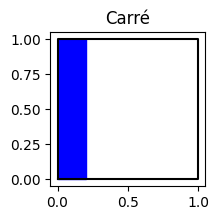

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as pch


def carre(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(2, 2))
    ax.plot([0, 0, 1, 1, 0], [0, 1, 1, 0, 0], "k-")
    ax.set_title("Carré")
    return ax


ax = carre()
ax.add_patch(pch.Rectangle((0, 0), 0.2, 1, color="blue"));

## Colorier en diagonale

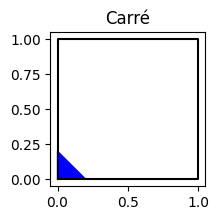

In [3]:
import numpy

ax = carre()
ax.add_patch(
    pch.Polygon(numpy.array([(0, 0), (0.2, 0), (0, 0.2), (0, 0)]), color="blue")
);

Moins facile...

## Fonction de la surface couverte

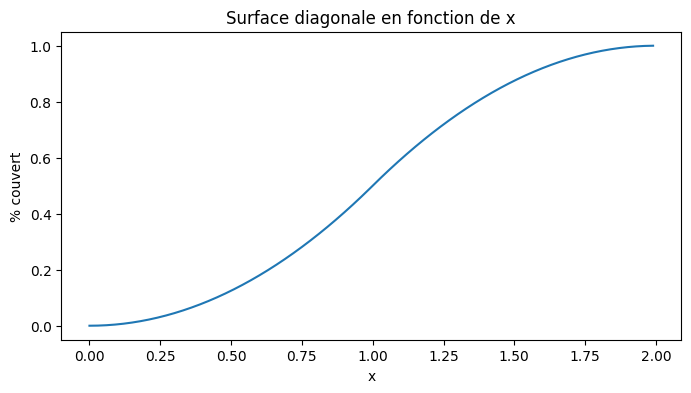

In [4]:
def surface(x):
    if x <= 1.0:
        return x**2 / 2
    if x <= 2.0:
        return surface(1) + 0.5 - surface(2 - x)


fig, ax = plt.subplots(1, 1, figsize=(8, 4))
X = numpy.arange(0, 200) / 100
Y = [surface(x) for x in X]
ax.plot(X, Y)
ax.set_title("Surface diagonale en fonction de x")
ax.set_xlabel("x")
ax.set_ylabel("% couvert");

Ce qui nous intéresse en fait, c'est la réciproque de la fonction. Première version, sans savoir calculer mais en supposant qu'elle est croissante.

In [5]:
def surface_inverse(y, precision=1e-3):
    x = 0
    while x <= 2:
        s = surface(x)
        if s >= y:
            break
        x += precision
    return x - precision / 2


surface_inverse(0.2)

0.6325000000000005

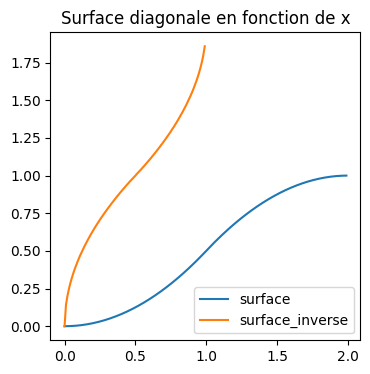

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
X = numpy.arange(0, 200) / 100
Y = [surface(x) for x in X]
ax.plot(X, Y, label="surface")
X2 = numpy.arange(0, 100) / 100
Y2 = [surface_inverse(x) for x in X2]
ax.plot(X2, Y2, label="surface_inverse")
ax.set_title("Surface diagonale en fonction de x")
ax.legend();

Ca marche mais...

In [7]:
%timeit surface(0.6)

139 ns ± 3.21 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [8]:
y = surface(0.6)
%timeit surface_inverse(y)

120 µs ± 10.3 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Et c'est de plus en plus long.

In [9]:
%timeit surface_inverse(y * 2)

197 µs ± 53.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Il y a plus court.

In [10]:
def surface_inverse_dicho(y, a=0.0, b=2.0, precision=1e-3):
    while abs(a - b) >= precision:
        m = (a + b) / 2.0
        s = surface(m)
        if s >= y:
            b = m
        else:
            a = m
    return (a + b) / 2.0


surface_inverse_dicho(0.2)

0.63232421875

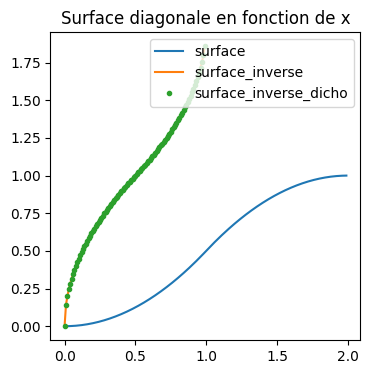

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
X = numpy.arange(0, 200) / 100
Y = [surface(x) for x in X]
ax.plot(X, Y, label="surface")
X2 = numpy.arange(0, 100) / 100
Y2 = [surface_inverse(x) for x in X2]
ax.plot(X2, Y2, label="surface_inverse")
X3 = numpy.arange(0, 100) / 100
Y3 = [surface_inverse_dicho(x) for x in X2]
ax.plot(X2, Y2, ".", label="surface_inverse_dicho")
ax.set_title("Surface diagonale en fonction de x")
ax.legend();

Ca marche.

In [12]:
y = surface(0.6)
%timeit surface_inverse_dicho(y)

2.9 µs ± 280 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [13]:
%timeit surface_inverse_dicho(y * 2)

3.74 µs ± 252 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Près de 50 fois plus rapide et cela ne dépend pas de *y* cette fois-ci. Peut-on faire mieux ? On peut tabuler.

In [14]:
N = 100
table = {int(surface(x * 1.0 / N) * N): x * 1.0 / N for x in range(0, N + 1)}


def surface_inv_table(y, N=N, precision=1e-3):
    i = int(y * N)
    a = table[i - 1]
    b = table[i + 1]
    return surface_inverse_dicho(y, a, b, precision=precision)


surface_inv_table(0.2)

0.63234375

In [15]:
y = surface(0.6)
%timeit surface_inv_table(y)

2.03 µs ± 221 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [16]:
y = surface(0.6)
%timeit surface_inv_table(y * 2)

1.62 µs ± 30.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


C'est mieux mais cette solution est un peu défectueuse en l'état, trouverez-vous pourquoi ? L'expression ``len(table)`` devrait vous y aider.

In [17]:
len(table)

51

## Version mathématique

Pour cette fonction, on sait calculer la réciproque de façon exacte.

In [18]:
def surface(x):
    if x <= 1.0:
        return x**2 / 2
    if x <= 2.0:
        return surface(1) + 0.5 - surface(2 - x)


def surface_inv_math(y):
    if y <= 0.5:
        # y = x**2 / 2
        return (y * 2) ** 0.5
    else:
        # y = 1 - (2-x)**2 / 2
        return 2 - ((1 - y) * 2) ** 0.5


surface_inv_math(0.2), surface_inv_math(0.8)

(0.6324555320336759, 1.3675444679663242)

In [19]:
y = surface(0.6)
%timeit surface_inv_math(y)

152 ns ± 11.1 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [20]:
y = surface(0.6)
%timeit surface_inv_math(y * 2)

163 ns ± 13.2 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


Il n'y a pas plus rapide mais cette option n'est pas toujours possible. Je passe la version écrite en C++, hors sujet pour le moment.

## Retour au coloriage

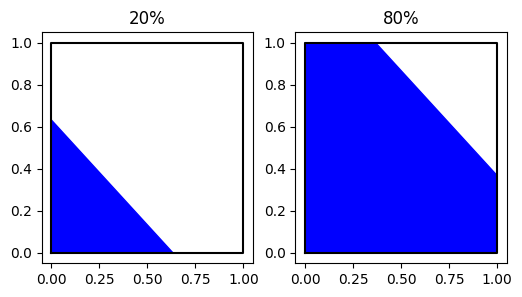

In [21]:
def coloriage_diagonale(y, ax=None):
    ax = carre(ax)
    if y <= 0.5:
        x = surface_inv_math(y)
        ax.add_patch(
            pch.Polygon(numpy.array([(0, 0), (x, 0), (0, x), (0, 0)]), color="blue")
        )
    else:
        ax.add_patch(
            pch.Polygon(numpy.array([(0, 0), (1, 0), (0, 1), (0, 0)]), color="blue")
        )
        x = surface_inv_math(y) - 1
        ax.add_patch(
            pch.Polygon(numpy.array([(1, 0), (1, x), (x, 1), (0, 1)]), color="blue")
        )
    return ax


fig, ax = plt.subplots(1, 2, figsize=(6, 3))
coloriage_diagonale(0.2, ax=ax[0])
coloriage_diagonale(0.8, ax=ax[1])
ax[0].set_title("20%")
ax[1].set_title("80%");

## A quoi ça sert ?

Une programme est la concrétisation d'une idée et il y a souvent un compromis entre le temps passé à la réaliser et la performance qu'on souhaite obtenir. Et c'est souvent sans fin car les machines évoluent rapidement ces temps-ci.